# Loading dependencies

In [1]:
import numpy as np
import skimage as ski
from skimage import io, color, exposure
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Prelims

In [2]:
np.random.seed(1000)
I = np.random.rand(3, 3)
print(I)

[[0.65358959 0.11500694 0.95028286]
 [0.4821914  0.87247454 0.21233268]
 [0.04070962 0.39719446 0.2331322 ]]


(-0.5, 2.5, 2.5, -0.5)

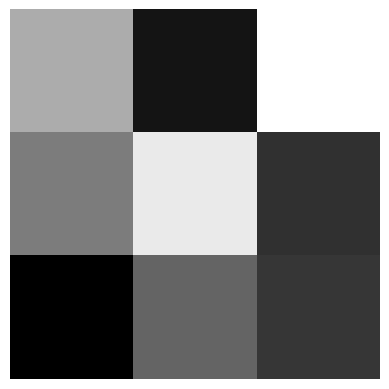

In [3]:
plt.imshow(I, cmap = 'grey')
plt.axis("off")

In [4]:
I2 = I + 0.5
print(I2)

[[1.15358959 0.61500694 1.45028286]
 [0.9821914  1.37247454 0.71233268]
 [0.54070962 0.89719446 0.7331322 ]]


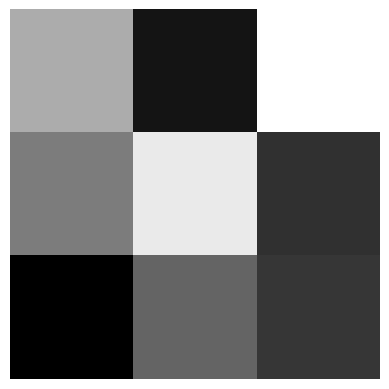

In [5]:
# option 1
I2[I2 > 1] = 1
I2[I2 < 0] = 0

# option 2
I2 = np.clip(I+0.5, 0, 1)
#plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off");

#print(I2)

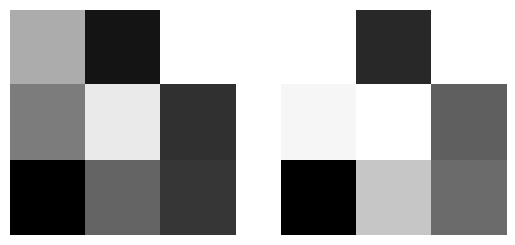

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

In [7]:
I3 = np.clip(I - 0.5, 0, 1)

Text(0.5, 1.0, 'I-0.5')

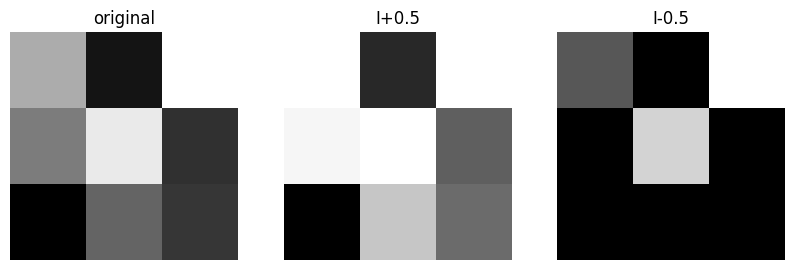

In [8]:
plt.figure(figsize = (10, 18))

plt.subplot(1, 3, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off")
plt.title("I+0.5")

plt.subplot(1, 3, 3)
plt.imshow(I3, cmap = 'grey')
plt.axis("off")
plt.title("I-0.5")

<ipython-input-9-0eb0171b1457>:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)
<ipython-input-9-0eb0171b1457>:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I2)
<ipython-input-9-0eb0171b1457>:15: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I3)


Text(0.5, 1.0, 'I/2')

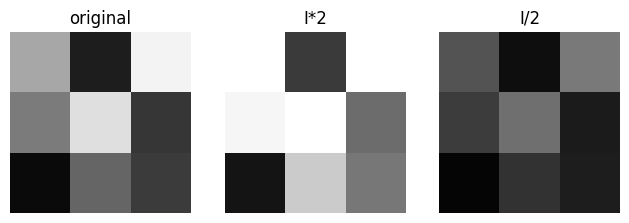

In [9]:
I2 = np.clip(I*2, 0, 1)
I3 = np.clip(I/2, 0, 1)

plt.subplot(1, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
io.imshow(I2)
plt.axis("off")
plt.title("I*2")

plt.subplot(1, 3, 3)
io.imshow(I3)
plt.axis("off")
plt.title("I/2")

# Landsat image

In [10]:
!ls

angiogram_bw.jpeg  landsat_down.jpeg  sample_data  xray.jpeg


In [11]:
I = io.imread("/content/landsat_down.jpeg")

Typically, skimage loads image in 8 bit format. However, skimage can also load 16 and 32 bit images.

In [12]:
print(I.dtype)

uint8


In [13]:
#I = I/255.0
I = ski.img_as_float(I)
I.shape

(1901, 2010)

In [14]:
print(I.min())
print(I.max())

0.0
1.0


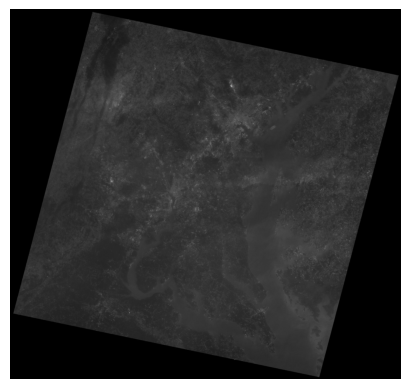

In [15]:
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.show()

Lets contrast stretch the image using the function -
$$I_{out} = 4 * (I_{in} - 0.1) $$


In [16]:
#WRONG
I_stretched = 4*(I-0.1)

In [17]:
print(I_stretched.min())
print(I_stretched.max())

-0.4
3.6


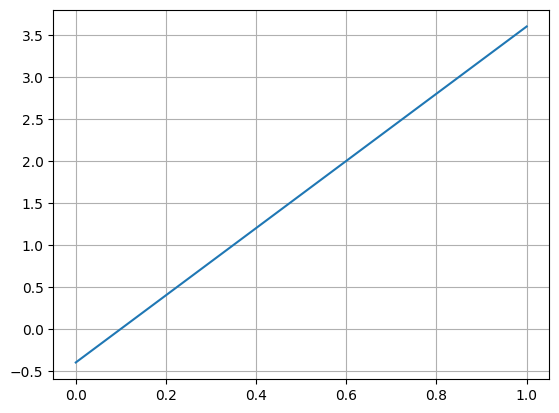

In [18]:
i_1 = np.linspace(0, 1, 10000)
i_2 = 4*(i_1 - 0.1)
plt.plot(i_1, i_2);
plt.grid();

In [19]:
#RIGHT
I_stretched = np.clip(4*(I-0.1), 0, 1)

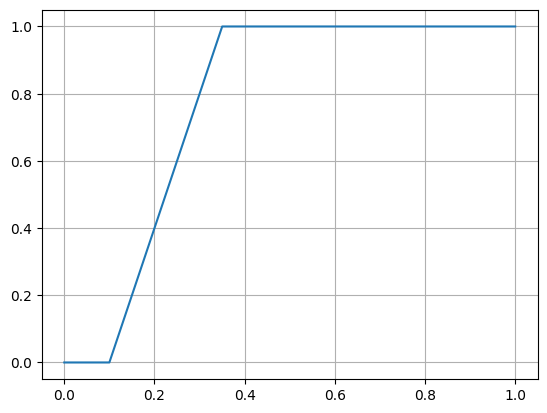

In [20]:
i_1 = np.linspace(0, 1, 10000)
i_2 = np.clip(4*(i_1 - 0.1), 0, 1)
plt.plot(i_1, i_2);
plt.grid();

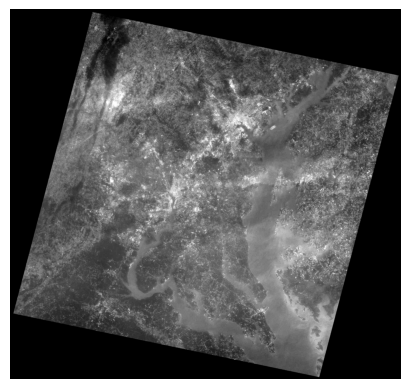

In [21]:
plt.imshow(I_stretched, cmap = 'grey');
plt.axis("off")
plt.show()

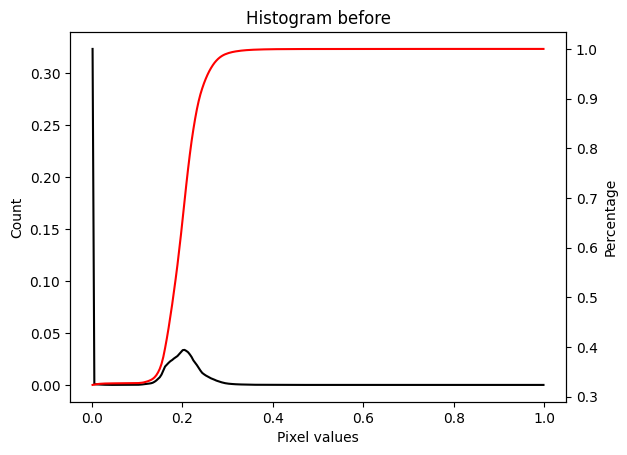

In [23]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)
#print(hist, bins_hist)
plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram before")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I, 256)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

Pixel values saturated in 0.1 to 0.3 region, the same region where we are stretching the contrast.

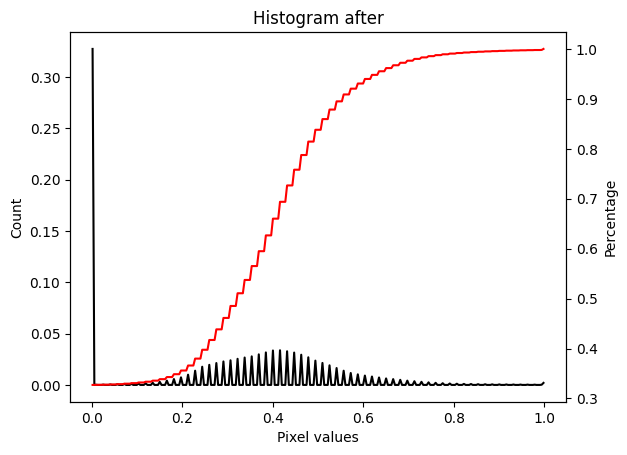

In [ ]:
hist, bins_hist = exposure.histogram(I_stretched, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram after")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I_stretched, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

The pixel values are now more spread out.

#Chest x-ray

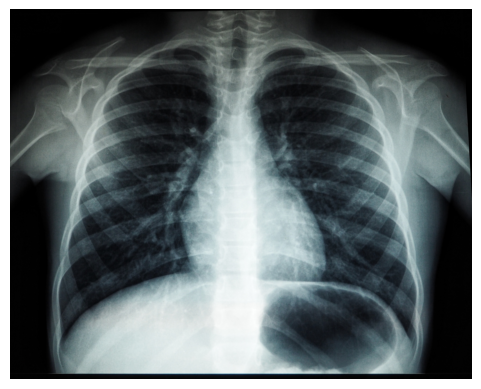

In [27]:
I = io.imread("/content/xray.jpeg")/255
plt.imshow(I)
plt.axis("off");

In [28]:
I = io.imread("/content/xray.jpeg")/255
I = color.rgb2gray(I)
print(I.shape)

(2831, 3537)


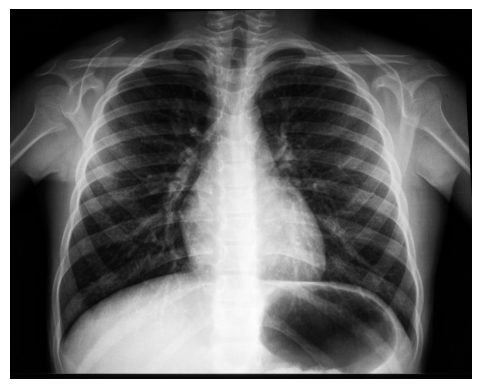

In [29]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

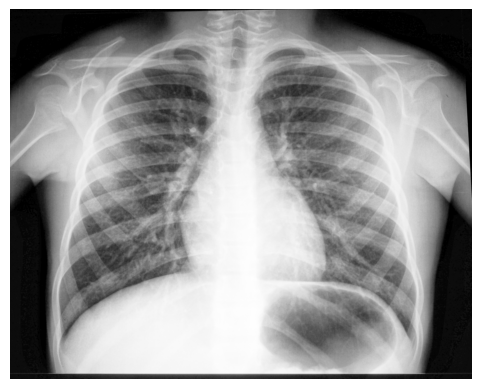

In [30]:
k = 20
I2 = np.log(1 + k*I)
I2 = I2/I2.max()
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

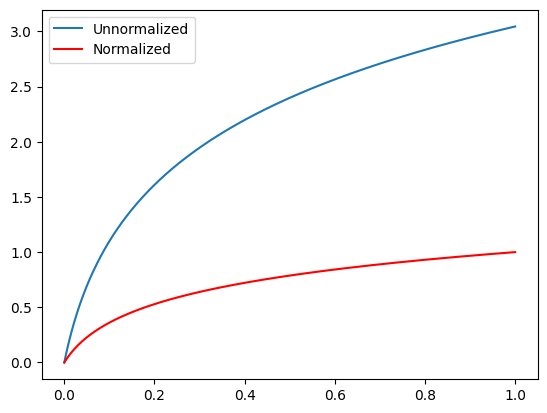

In [31]:
k = 20
i_1 = np.linspace(0, 1, 10000)
i_2 = np.log(1 + k*i_1)
i_3 = i_2/i_2.max()
plt.plot(i_1, i_2, label = 'Unnormalized');
plt.plot(i_1, i_3, color = 'red', label = 'Normalized');
plt.legend();

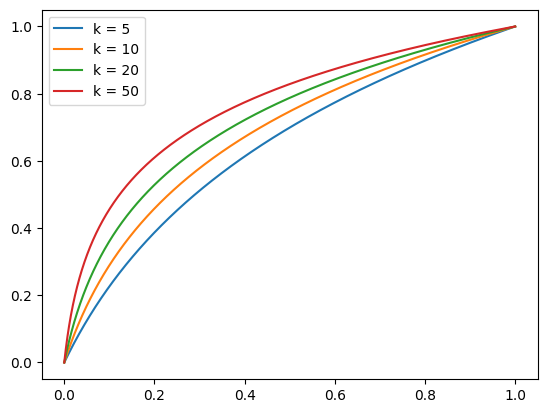

In [32]:
ks = [5, 10, 20, 50]
for k in ks:
  i_1 = np.linspace(0, 1, 10000)
  i_2 = np.log(1 + k*i_1)
  i_2 = i_2/i_2.max()
  plt.plot(i_1, i_2, label = "k = " + str(k));
  plt.legend();

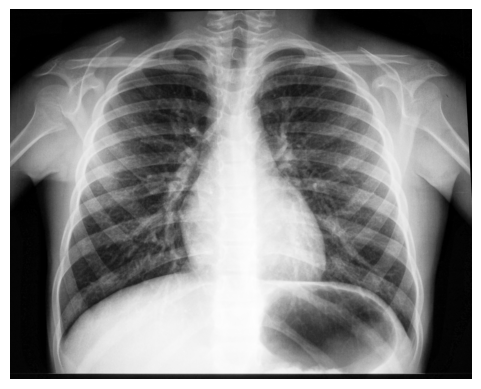

In [33]:
k = 5
I2 = np.log(1 + k*I)
I2 = I2/I2.max()
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

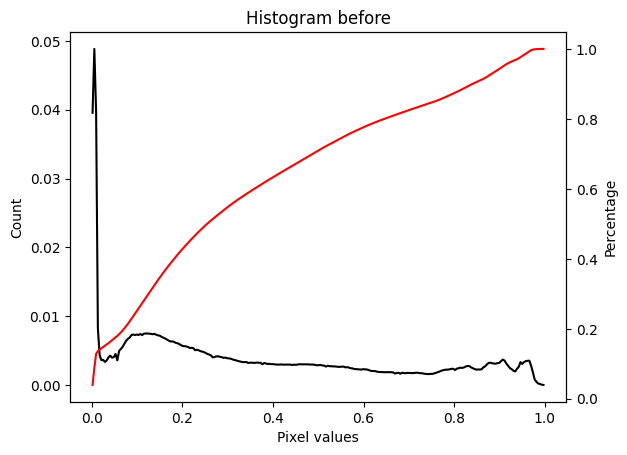

In [34]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)
#print(hist, bins_hist)
plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram before")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I, 256)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

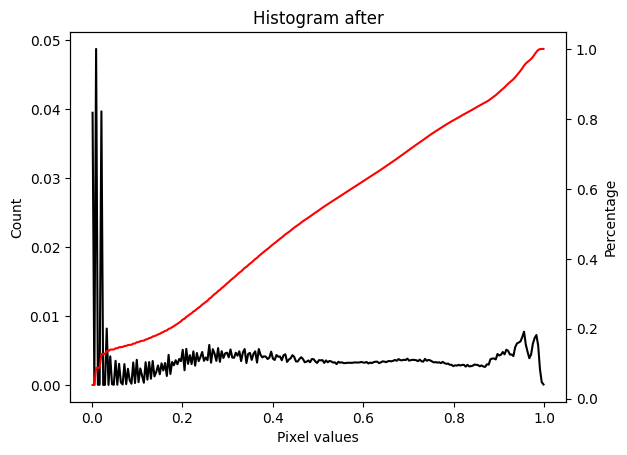

In [35]:
hist, bins_hist = exposure.histogram(I2, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram after")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I2, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

In [36]:
I3 = 1 - I

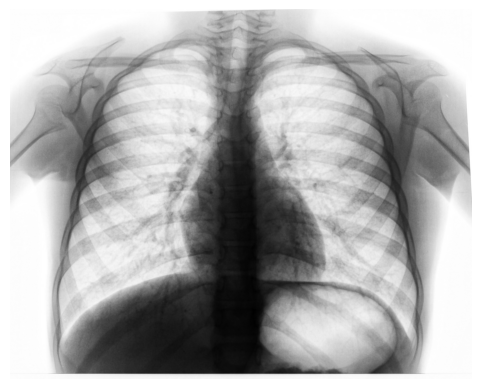

In [37]:
plt.imshow(I3, cmap = 'grey');
plt.axis("off");

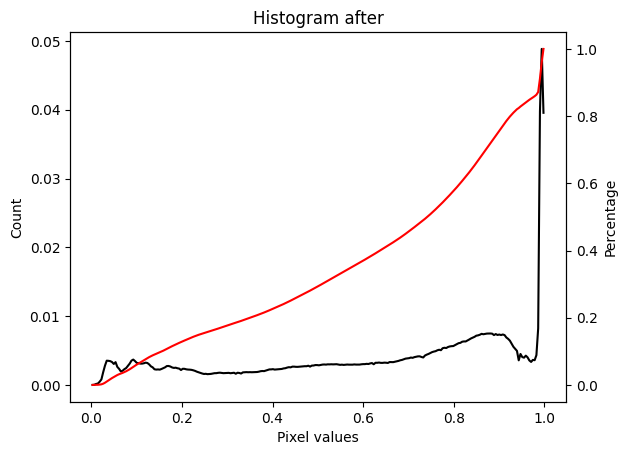

In [38]:
hist, bins_hist = exposure.histogram(I3, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram after")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I3, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

In [39]:
gamma = 0.5
c = 1
I4 = c*(I ** gamma)
print(I4.min())
print(I4.max())

0.0
0.99958324649159


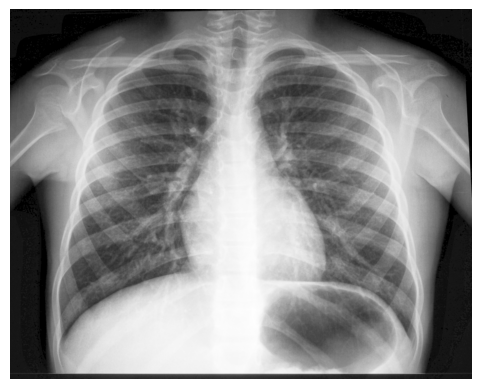

In [40]:
plt.imshow(I4, cmap = 'grey')
plt.axis("off");

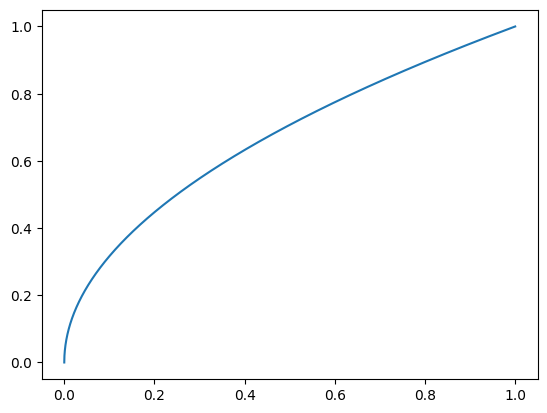

In [41]:
gamma = 0.5
c = 1
i_1 = np.linspace(0, 1, 10000)
i_2 = c*(i_1 ** gamma)
plt.plot(i_1, i_2);

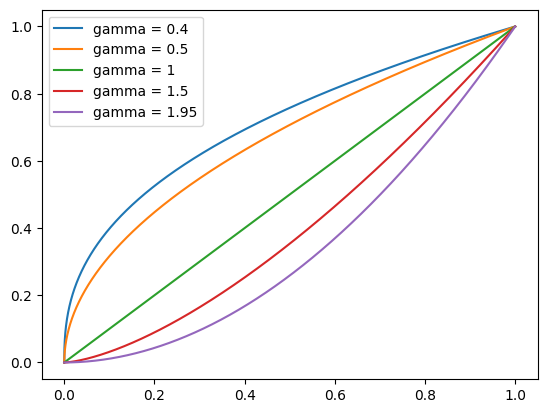

In [42]:
gammas = [0.4, 0.5, 1, 1.5, 1.95]
for gamma in gammas:
  c = 1
  i_1 = np.linspace(0, 1, 10000)
  i_2 = c*(i_1 ** gamma)
  plt.plot(i_1, i_2, label = "gamma = " + str(gamma));
  plt.legend();

#Angiogram

In [44]:
I = io.imread("/content/angiogram_bw.jpeg")
I = I/255
I.shape

(376, 374)

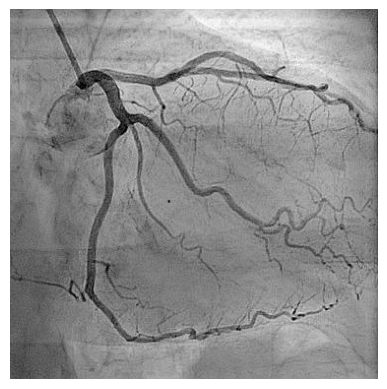

In [45]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

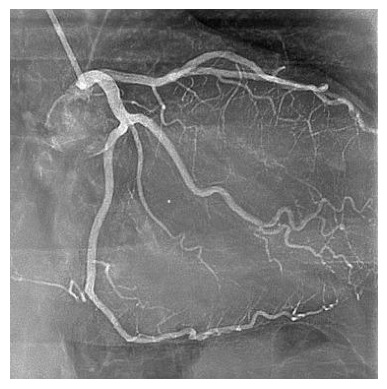

In [46]:
plt.imshow(1-I, cmap = 'grey')
plt.axis("off");

In [47]:
negImg = 1 - I

In [48]:
A = 0.6
B = 0.85
negImg[negImg < A] = 0
negImg[negImg > B] = 0

negImg[(negImg >= A) & (negImg <= B)] = 1

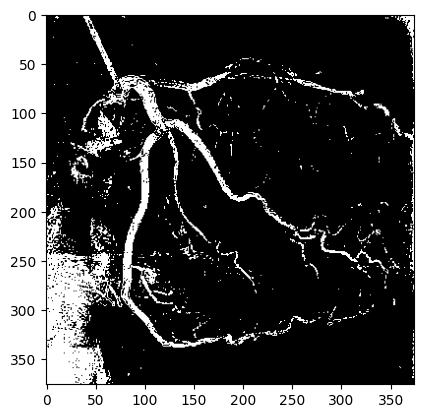

In [49]:
plt.imshow(negImg, cmap = 'grey');

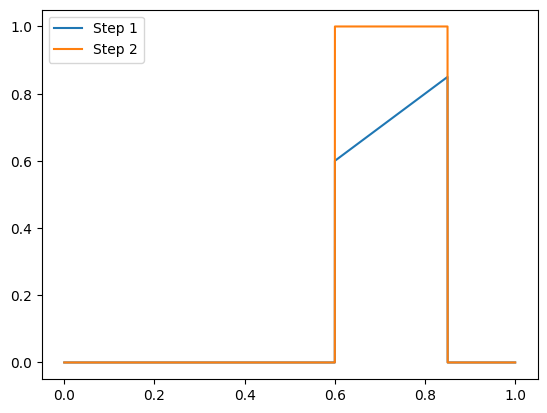

In [51]:
i_1 = np.linspace(0, 1, 10000)
A = 0.6
B = 0.85
i_2 = i_1.copy()
i_2[i_2 < A] = 0
i_2[i_2 > B] = 0

plt.plot(i_1, i_2, label = 'Step 1')

i_3 = i_2.copy()
i_3[(i_3 >= A) & (i_3 <= B)] = 1

plt.plot(i_1, i_3, label = 'Step 2')
plt.legend();

In [ ]:
negImg = 1 - I

In [ ]:
A = 0.6
B = 0.85

negImg[(negImg >= A) & (negImg <= B)] = 1

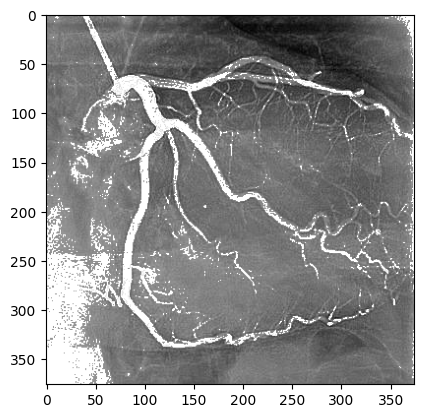

In [ ]:
plt.imshow(negImg, cmap = 'grey');

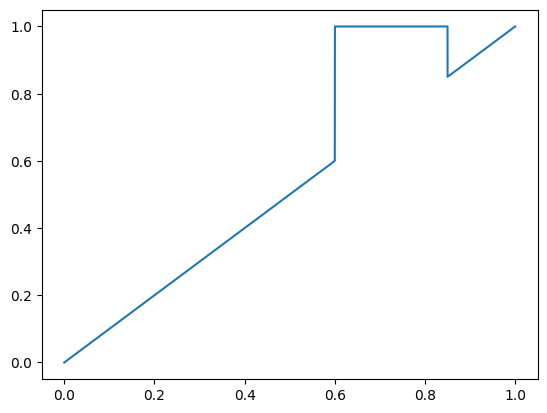

In [ ]:
i_1 = np.linspace(0, 1, 10000)
A = 0.6
B = 0.85

i_2 = i_1.copy()
i_2[(i_2 >= A) & (i_2 <= B)] = 1

plt.plot(i_1, i_2);